In [392]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from fcmeans import FCM
from sklearn.cluster import DBSCAN

In [393]:
data1 = pd.read_csv("first_clustering_dataset.csv").to_numpy()
data2 = pd.read_csv("second_clustering_dataset.csv").to_numpy()
data3 = pd.read_csv("third_clustering_dataset.csv").to_numpy()

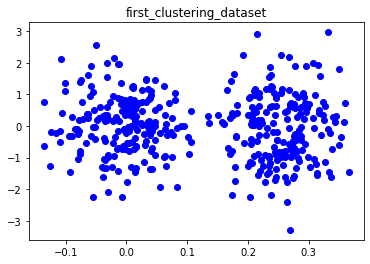

In [394]:
plt.title("first_clustering_dataset")
plt.plot(data1[:,0],data1[:,1],'ro', color="blue") 

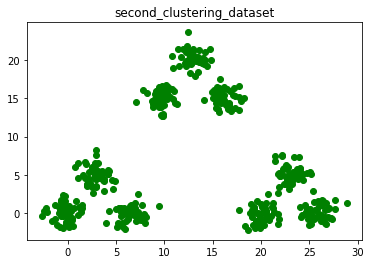

In [395]:
plt.title("second_clustering_dataset")
plt.plot(data2[:,0],data2[:,1],'ro', color="green") 

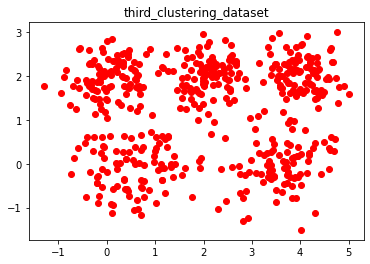

In [396]:
plt.title("third_clustering_dataset")
plt.plot(data3[:,0],data3[:,1],'ro' , color = 'red') 

# k-means

In [397]:
def KMEANS(number_of_clusters , data, title , random_c):
    model = KMeans(n_clusters= number_of_clusters , n_init = random_c)
    label = model.fit_predict(data)
    centroids = pd.DataFrame(model.cluster_centers_,columns=['x','y'])
    plt.scatter(data[:,0], data[:,1], s=40, c=label, cmap=plt.cm.Spectral)
    plt.scatter(centroids.x,centroids.y, s=180, c="red", marker='X')
    plt.title(title)
    plt.show()
    print('SSE:',model.inertia_)
    print("silhouette_score: " , silhouette_score(data, label))

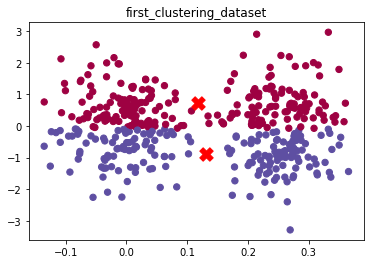

SSE: 146.8952861878667
silhouette_score:  0.5362906097948957


In [406]:
KMEANS(2 , data1, "first_clustering_dataset" , 10)

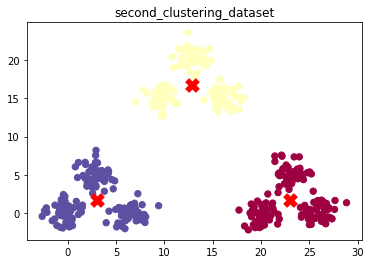

SSE: 6481.457131217972
silhouette_score:  0.7237468270694951


In [399]:
KMEANS(3 , data2 , "second_clustering_dataset", 10)

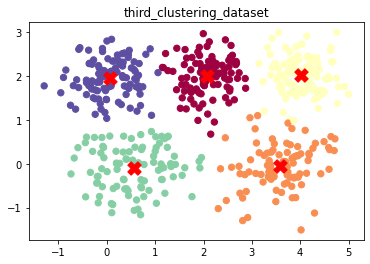

SSE: 222.20103182093084
silhouette_score:  0.5602863169324205


In [400]:
KMEANS(5 , data3, "third_clustering_dataset", 10)

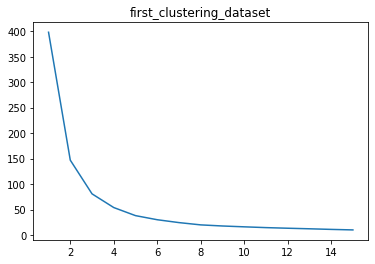

In [401]:
sse_list = []
for i in range(1,16):
    model = KMeans(n_clusters= i , n_init = 200)
    label = model.fit_predict(data1)
    centroids = pd.DataFrame(model.cluster_centers_,columns=['x','y'])
    sse_list.append(model.inertia_)
plt.plot(range(1,16),sse_list)
plt.title("first_clustering_dataset")
plt.show()

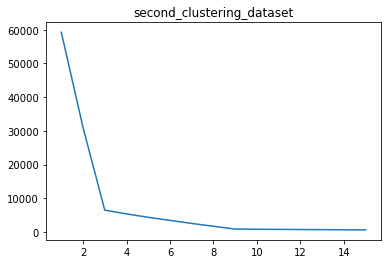

In [407]:
sse_list = []
for i in range(1,16):
    model = KMeans(n_clusters= i , n_init = 200)
    label = model.fit_predict(data2)
    centroids = pd.DataFrame(model.cluster_centers_,columns=['x','y'])
    sse_list.append(model.inertia_)
plt.plot(range(1,16),sse_list)
plt.title("second_clustering_dataset")
plt.show()

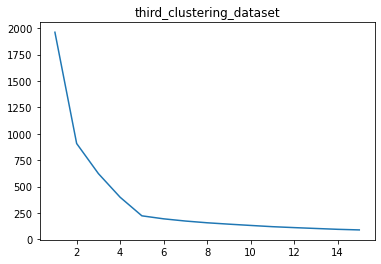

In [408]:
sse_list = []
for i in range(1,16):
    model = KMeans(n_clusters= i , n_init = 200)
    label = model.fit_predict(data3)
    centroids = pd.DataFrame(model.cluster_centers_,columns=['x','y'])
    sse_list.append(model.inertia_)
plt.plot(range(1,16),sse_list)
plt.title("third_clustering_dataset")
plt.show()

# fuzzy c-means

In [409]:
def fcm_func(number_of_cluster , data , title):
    fcm = FCM(n_clusters=number_of_cluster)
    fcm.fit(data)
    fcm_centers = pd.DataFrame(fcm.centers ,columns=['x','y'])
    fcm_labels = fcm.predict(data)
    plt.scatter(data[:,0], data[:,1], s=40, c=fcm_labels, cmap=plt.cm.Spectral)
    plt.scatter(fcm_centers.x,fcm_centers.y, s=180, c="red", marker='X')
    plt.title(title)
    plt.show()
    print("SSE:", SSE_calc(data,fcm_labels,fcm_centers))
    print("silhouette score:", silhouette_score(data, fcm_labels ))

In [419]:
def SSE_calc(data,label,centroids):
    sse_error = 0
    for x,y,l in zip(data[:,0],data[:,1],label):
        sse_error += (x-centroids.loc[l,'x'])**2+(y-centroids.loc[l,'y'])**2
    return sse_error

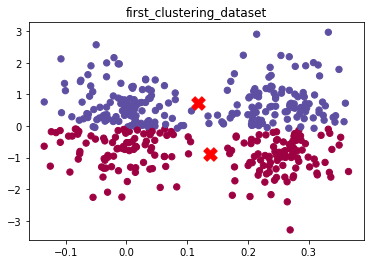

SSE: 146.97353315694622
silhouette score: 0.5362906097948957


In [420]:
fcm_func(2 , data1 , "first_clustering_dataset")

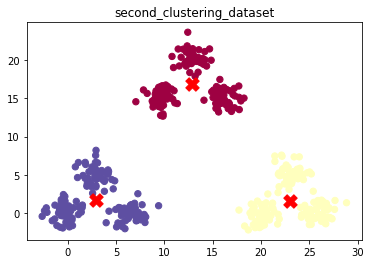

SSE: 6483.787312525015
silhouette score: 0.7237468270694951


In [423]:
fcm_func(3 , data2 , "second_clustering_dataset")

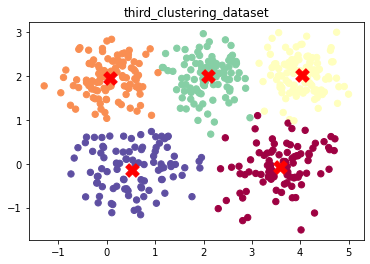

SSE: 222.70014258867013
silhouette score: 0.5603854414857858


In [424]:
fcm_func(5 , data3 , "third_clustering_dataset")

# DBSCAN 

In [425]:
def dbscan_func(v_eps , v_min_samples , data , title):
    dbscan = DBSCAN(eps = v_eps, min_samples = v_min_samples).fit(data)
    labels = dbscan.labels_ 
    plt.scatter(data[:, 0], data[:,1], c = labels, cmap= "plasma") 
    plt.title(title)
    plt.show()
    print("silhouette score:", silhouette_score(data, labels))

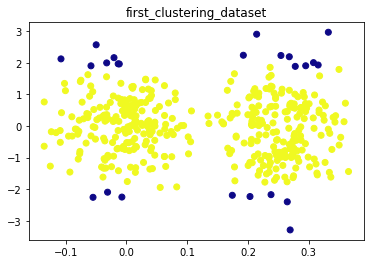

silhouette score: 0.5209074396387854


In [426]:
dbscan_func(0.25, 10, data1, "first_clustering_dataset")

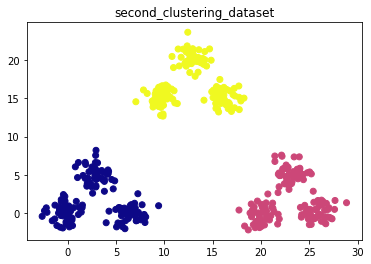

silhouette score: 0.7237468270694951


In [427]:
dbscan_func(6 , 2 , data2, "second_clustering_dataset")

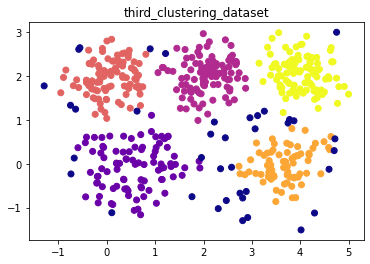

silhouette score: 0.5096430444220791


In [428]:
dbscan_func(0.39, 10, data3, "third_clustering_dataset")